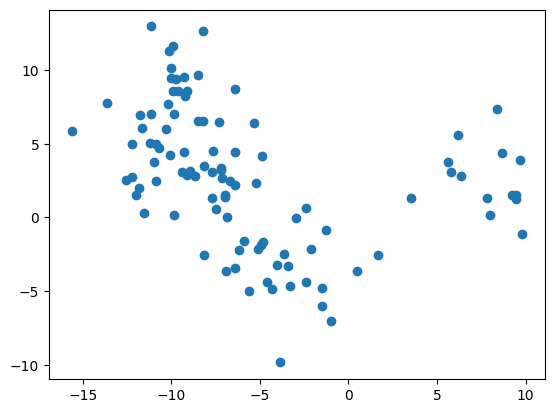

In [49]:
#Лабораторная работа 5
#Вариант 1
# Подключение библиотек
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import fcluster
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
X, y = make_blobs(n_samples=100,random_state = 34, cluster_std=2.1, centers= 7, n_features = 2)
plt.scatter(X[:, 0], X[:, 1])



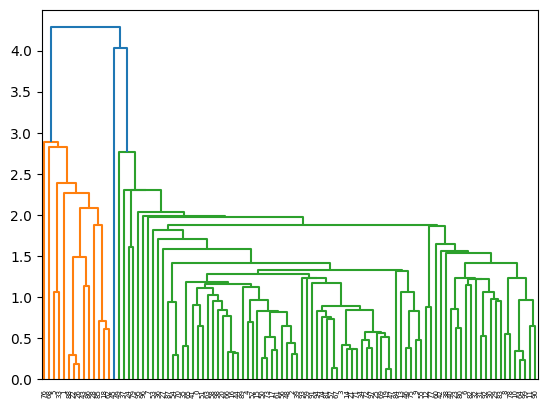

In [50]:
# Иерархическая кластеризация выборки
#Ближайшего соседа
mergings_single = linkage(X, method='single')
mergings_single
dendrogram(mergings_single)
plt.show()

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5],
  [45.0, 45.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [50.0, 50.0, 70.0, 70.0],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [95.0, 95.0, 112.5, 112.5],
  [85.0, 85.0, 103.75, 103.75],
  [60.0, 60.0, 94.375, 94.375],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [135.0, 135.0, 152.5, 152.5],
  [77.1875, 77.1875, 143.75, 143.75],
  [13.75, 13.75, 110.46875, 110.46875],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [215.0, 215.0, 225.0, 225.0],
  [235.0, 235.0, 245.0, 245.0],
  [220.0, 220.0, 240.0, 240.0],
  [205.0, 205.0, 230.0, 230.0],
  [182.5, 182.5, 217.5, 217.5],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [285.0, 285.0, 302.5, 302.5],
  [325.0, 325.0, 335.0, 335.0],
  [293.75, 293.75, 330.0, 330.0],
  [365.0, 365.0, 375.0, 375.0],
  [355.0, 

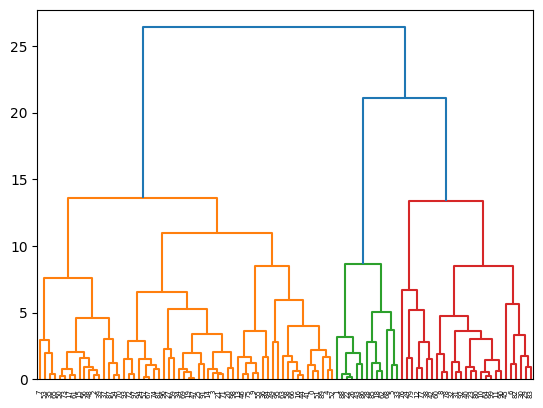

In [51]:
# Дальнего соседа
mergings_complete = linkage(X, method='complete')
mergings_complete
dendrogram(mergings_complete)

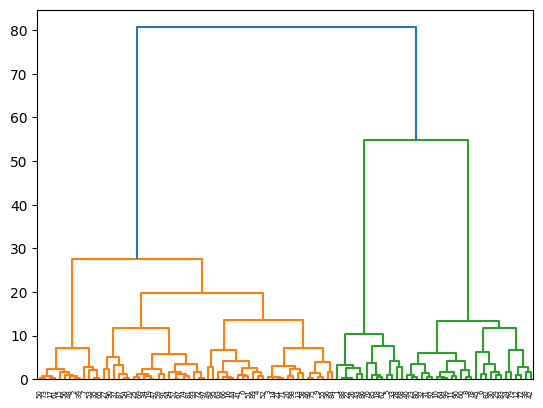

In [52]:
# Метод Уорда
mergings_ward = linkage(X, method='ward')
mergings_ward
dendrogram(mergings_ward)
plt.show()

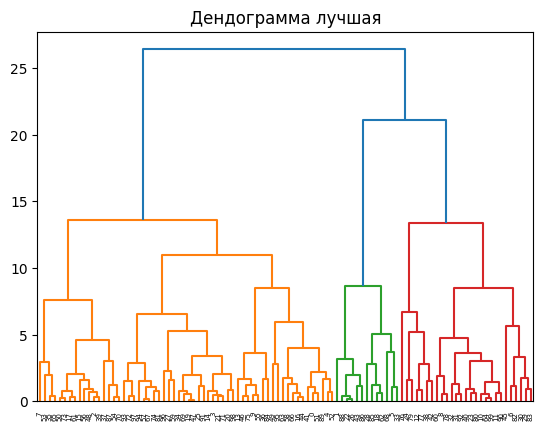

In [53]:
# Выбор дендограммы лучшего разбиения
mergings_best = linkage(X, method='complete')  
dendrogram(mergings_best)
plt.title("Дендограмма лучшая")
plt.show()


Назначения иерархической кластеризации: [3 4 1 2 3 4 6 1 6 3 6 6 5 3 2 1 3 1 4 2 2 2 4 6 5 2 4 2 4 6 6 6 6 4 2 1 3
 1 5 1 6 3 5 4 3 6 3 2 1 3 1 3 3 1 1 3 1 2 3 2 6 1 4 3 6 1 3 2 4 2 1 2 2 1
 2 3 5 5 6 5 6 2 6 6 3 4 4 1 4 3 6 2 6 2 2 3 2 2 2 6]
Обновленные центры кластеров: [[ -9.1233554    9.36040385]
 [ -7.44868675   2.94751449]
 [-11.54634727   4.48243435]
 [  8.03840886   2.74756109]
 [ -0.43753808  -1.04143661]
 [ -4.37436773  -3.93866267]]


C:\Users\rewaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rewaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rewaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rewaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

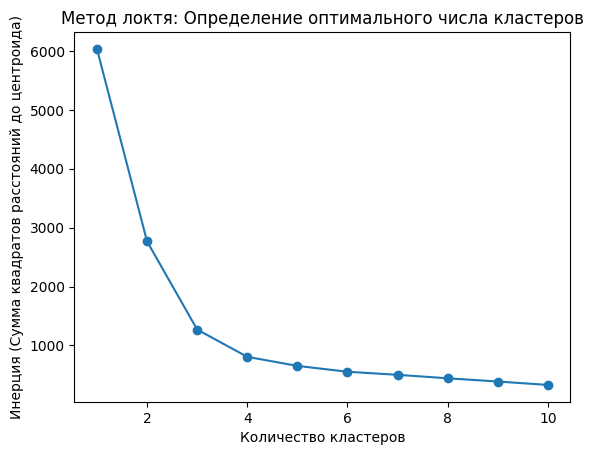

C:\Users\rewaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


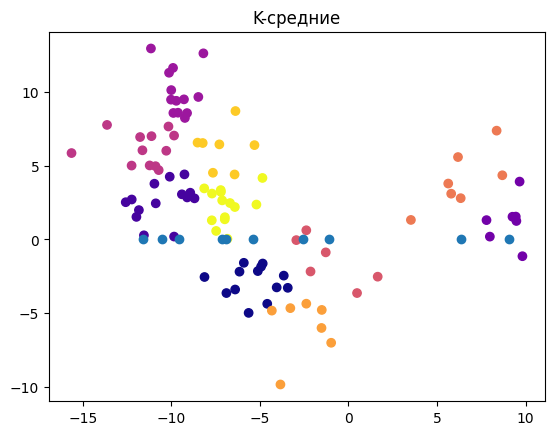

In [54]:
T = fcluster(mergings_best, 10, 'distance')
print("Назначения иерархической кластеризации:", T)
kmeans_optimal = KMeans(n_clusters=optimal_k, n_init=None)
# Функция обновления центров кластеров
def update_cluster_centers(X, c):
    mu = np.zeros((len(np.unique(c)), X.shape[1]))
    for cluster_id in np.unique(c):
        ix = np.where(c == cluster_id)
        mu[cluster_id - 1, :] = np.mean(X[ix, :], axis=(0, 1))
    return mu

# Обновление центров кластеров с использованием назначений иерархической кластеризации
mu = update_cluster_centers(X, T)
print("Обновленные центры кластеров:", mu)

inertia_values = []

#Метод локтя 
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Построение графика метода локтя
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title("Метод локтя: Определение оптимального числа кластеров")
plt.xlabel("Количество кластеров")
plt.ylabel("Инерция (Сумма квадратов расстояний до центроида)")
plt.show()
# Выбор оптимального числа кластеров 
optimal_k = np.argmin(inertia_values) + 1
kmeans_optimal = KMeans(n_clusters=optimal_k, n_init=10)
# Кластеризация методом KMeans 
kmeans_optimal = KMeans(n_clusters=optimal_k)
kmeans_optimal.fit(X)
predictions_optimal = kmeans_optimal.predict(X)

# Отображение разбиения на кластеры и центроиды
plt.scatter(X[:, 0], X[:, 1], c=predictions_optimal, cmap='plasma')
plt.scatter(kmeans_optimal.cluster_centers_[:, 0], np.zeros_like(kmeans_optimal.cluster_centers_[:, 0]))
plt.title(f"K-средние")
plt.show()

In [55]:
def calculate_avg_intra_cluster_distance(X, labels, metric='euclidean'):
    total_distance = 0
    num_clusters = len(np.unique(labels))
    for cluster_id in np.unique(labels):
        cluster_points = X[labels == cluster_id]
        if len(cluster_points) > 1:
            total_distance += np.sum(pairwise_distances(cluster_points, metric=metric))
    return total_distance / (len(X) - num_clusters)

# Средняя сумма межкластерных расстояний
def calculate_avg_inter_cluster_distance(X, labels, metric='euclidean'):
    cluster_centers = np.array([np.mean(X[labels == cluster_id], axis=0) for cluster_id in np.unique(labels)])
    return np.sum(pairwise_distances(cluster_centers, metric=metric))

# Расчет средних сумм расстояний для различных значений k
avg_intra_distances = []
avg_inter_distances = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    labels = kmeans.labels_
    
    avg_intra_distance = calculate_avg_intra_cluster_distance(X, labels)
    avg_inter_distance = calculate_avg_inter_cluster_distance(X, labels)
    
    avg_intra_distances.append(avg_intra_distance)
    avg_inter_distances.append(avg_inter_distance)

    
columns = pd.MultiIndex.from_product([['Иерархический метод', 'Метод k-средних'],
                                       ['Сумма квадратов расстояний до центроида',
                                        'Сумма средних внутрикластерных расстояний',
                                        'Сумма межкластерных расстояний']])

# Создание пустого DataFrame
df = pd.DataFrame(columns=columns)

# Добавление значений в таблицу
df['Метод k-средних', 'Сумма квадратов расстояний до центроида'] = [inertia_values[optimal_k - 1]]
df['Метод k-средних', 'Сумма средних внутрикластерных расстояний'] = [avg_intra_distances[optimal_k - 1]]
df['Метод k-средних', 'Сумма межкластерных расстояний'] = [avg_inter_distances[optimal_k - 1]]

df['Метод k-средних', 'Сумма квадратов расстояний до центроида'] = [inertia_values[optimal_k - 1]]
df['Метод k-средних', 'Сумма средних внутрикластерных расстояний'] = [avg_intra_distances[optimal_k - 1]]
df['Метод k-средних', 'Сумма межкластерных расстояний'] = [avg_inter_distances[optimal_k - 1]]

# Вывод 
print(df)   


C:\Users\rewaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rewaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rewaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rewaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

                      Иерархический метод  \
  Сумма квадратов расстояний до центроида   
0                                     NaN   

                                                                            \
  Сумма средних внутрикластерных расстояний Сумма межкластерных расстояний   
0                                       NaN                            NaN   

                          Метод k-средних  \
  Сумма квадратов расстояний до центроида   
0                              329.929481   

                                                                            
  Сумма средних внутрикластерных расстояний Сумма межкластерных расстояний  
0                                 30.336777                    1038.819314  
